#Chapter 2: Estimation and errors: Describing data

In [9]:
%pylab inline
import numpy as np
import pylab as plt
import figrc

theme = figrc.Theme_Gray() + figrc.Theme_Ezrc(16, 1, 22)
theme.apply()

Populating the interactive namespace from numpy and matplotlib


# Background information

## Exploring the stellar parameter dataset from the lecture

Look at the file `star.dat` in the data directory. This contains the astrophysical parameters (columns) for
stars (one star per row). 

We will now explore the different properties from this dataset and highlight some correlations and eventually emphasize the physics.

In [225]:
data = np.recfromcsv('star.csv')
data.dtype

dtype([('g', '<i8'), ('ag', '<f8'), ('dist', '<f8'), ('mass', '<f8'), ('radius', '<f8'), ('lum', '<f8'), ('mg', '<f8'), ('teff', '<f8'), ('logg', '<f8'), ('met', '<f8')])

| Column | Description |
| ------ | ------------|
| g      | luminosity in the G band (gaia integrated luminosity) |
| ag     | attenuation in the G band from dust absorption |
| dist   | distance to the star |
| mass   | mass of the star |
| radius | radius of the star |
| lum    | bolometric log-luminosity of the star|
| mg     | magnitude in G band |
| teff   | effective temperature |
| logg   | logarithm of the surface gravity |
| met    | metallicity |

### Let's redo some plots from the lecture

* First an histogram of the `mass` column

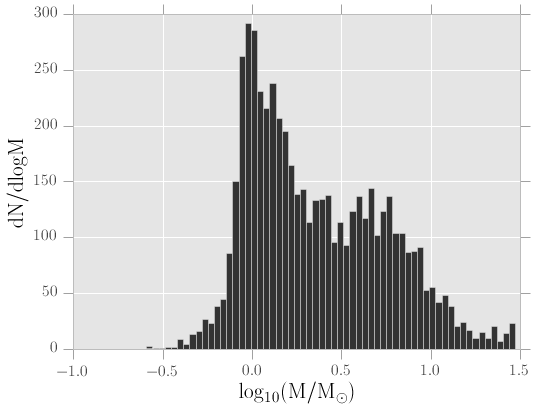

In [7]:
plt.hist(np.log10(data['mass']), bins=60)
plt.xlabel(r'log$_{10}$(M/M$_\odot$)')
plt.ylabel(r'dN/dlogM');

* A boxplot showing the dispersion of the data in the `teff` column when binned according to `logg` values

**In python there is never one single method to do so.**

Below, I do the plot from basic libraries and then with Pandas. 
Note that `pandas` and `seaborn` could offer good alternatives but requires some learning.

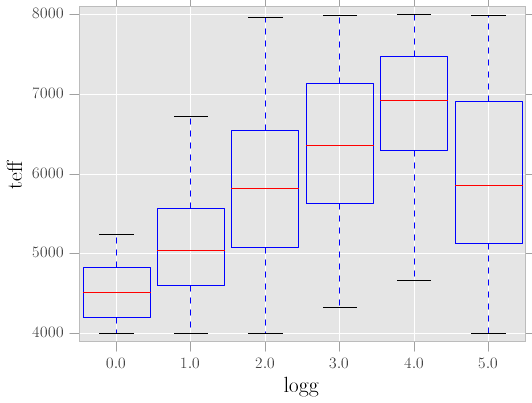

In [71]:
from itertools import groupby

#extract column information and sort by logg
logg = np.round(data['logg'])
ind = np.argsort(logg)
teff = data['teff'][ind]
logg = np.round(data['logg'])[ind]

# group data by logg values
d = []
pos = []
for v, g in groupby(zip(teff, logg), lambda x: x[1]):
    pos.append(v)
    d.append(np.array(list(g))[:, 0])

# plot
plt.boxplot(d, positions=pos, widths=0.9)
plt.ylim(3900, 8100)
plt.xlabel('logg')
plt.ylabel('teff');

Using the `pandas` package, could be a bit more efficient for this particular plot. Below I give an example of similar figure using `pandas`

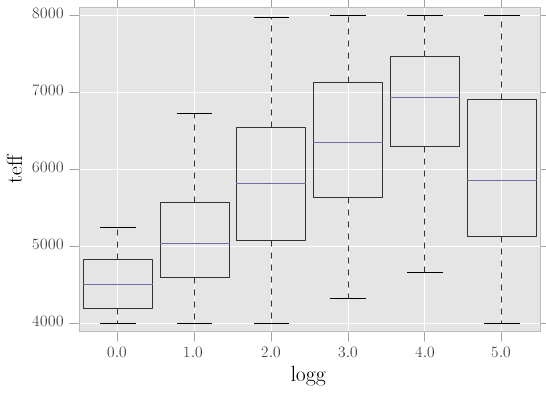

In [138]:
from pandas import DataFrame

df = DataFrame(data)
df.boxplot('teff', by=np.round(df['logg']), widths=0.9);
plt.suptitle('')
plt.title('')
plt.ylim(3900, 8100)
plt.xlabel('logg')
plt.ylabel('teff');


### Some 2d distributions

Again many possibilities to make similar plots. I only show one method, feel free to explore other ways.

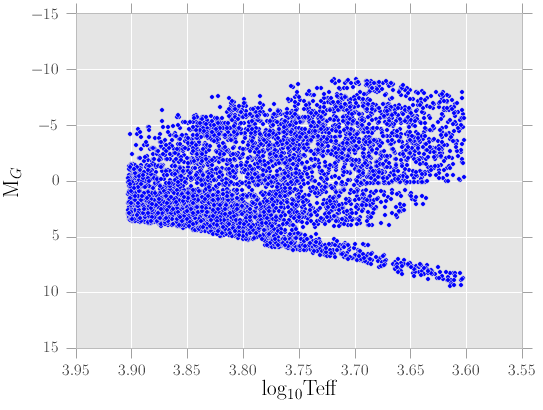

In [104]:
plt.scatter(np.log10(data['teff']), data['mg'])
plt.ylim(plt.ylim()[::-1])
plt.xlim(plt.xlim()[::-1])
plt.xlabel('log$_{10}$Teff')
plt.ylabel('M$_G$');

Density distributions can be represented by many means. Below I show an histrogram and a gaussian kernel density estimator.

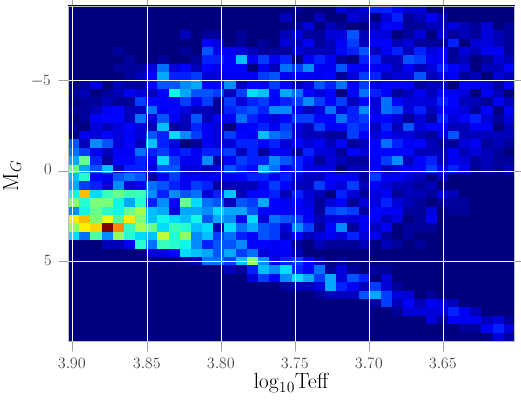

In [106]:
plt.hist2d(np.log10(data['teff']), data['mg'], bins=40)
plt.ylim(plt.ylim()[::-1])
plt.xlim(plt.xlim()[::-1])
plt.xlabel('log$_{10}$Teff')
plt.ylabel('M$_G$');

Unfortunately, there is not a one-liner KDE plot with the standard libraries.

Note that `seaborn` offers a one-liner option. (`sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)`)

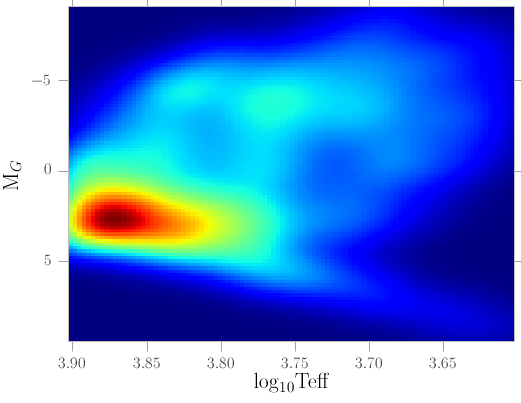

In [115]:
from scipy.stats import gaussian_kde
kernel = gaussian_kde(np.vstack([np.log10(data['teff']), data['mg']]))
mins = kernel.dataset.min(1)
maxs = kernel.dataset.max(1)
X, Y = np.meshgrid(np.linspace(mins[0], maxs[0],100), np.linspace(mins[1], maxs[1],100))
vals = kernel(np.vstack([X.ravel(),Y.ravel()])).reshape(X.shape)
plt.pcolor(X, Y, vals)
plt.xlim(maxs[0], mins[0])
plt.ylim(maxs[1], mins[1])
plt.xlabel('log$_{10}$Teff')
plt.ylabel('M$_G$');

# Exercices

## Exercice 1: more exploration on stellar parameters (20 points)


Again, the dataset represents properties of individual stars. _We_ know from stellar physics that there are relations between stellar properties, such as _luminosity_, _gravity_, and _mass_. These relations are relatively simple equations:

* magnitudes and luminosities are related with

$$ M = -2.5 \log_{10} (lum) $$

* luminosity and magnitudes depend on distance as:
$$  G - 5  \log_{10}(dist) = M_G + A_G - 5 $$

* Luminosity is related to the temperature by thermodynamics  ($\sigma \approx 5.670373 . 10^{-8} W . m^{-2}.  K^{-4}$ is the Stefan–Boltzmann constant):
$$ L = 4 \pi R^2 \sigma T_{eff} ^ 4 $$


* and gravity comes from the mass and usual newtonian equation ($\mathcal{G} \approx 6.673 . 10^{-11} N.(m/kg) ^ 2$, gravitational constant)

$$ g = \frac{\mathcal{G} M}{R^2} $$

**Now you're on your own... **

1. Visualize for each of the 4 relations if the stars from the dataset obey stellar physics.

2. Reality is never perfect, either because our understanding of stellar physics is imperfect, or uncertain measurements. For each relation, characterize the dispersion of the dataset with respect to our expectations from the physics.

**tip**: the table at the top of this document describes the columns of the dataset.

## Excercise 2: Variable transformations (15 points)


    

Consider the uniform distribution, $p(x)$. 

* Show empirically that $m = (x_{max} + x_{min} )/2$ ("midpoint") is a more efficient estimator than the mean, $\mu$.
    Do this by drawing a sample of size $n$ from the distribution, calculating the estimators,
    and then plotting them against a large range of values $n$, in order to see which converges more rapidly.

* How the variation of the standard deviation of $\mu$ with $n$ compares with theory? (i.e., overplot it). 
* How the standard deviation in m varies with n? Explain your result.

**Recall that "efficiency" refers to the variance of the estimator. **

**Hint**: generate many samples for a given $n$, calculate for each the mean and midpoint, then compute the
mean and standard deviation of the estimators (given $n$). 

** Important: Careful to the stddev definition in your coding language **, it may not be always the same

## Exercice 3: Monty Hall or Three doors problem. (30 points)

You are in a game show and presented with three closed doors.
Behind one of them (chosen at random without your knowledge) is a prize car, behind each of the
others is a goat. Your goal is to reveal (and thus win) the car. 

You first select a door at random.

The game show host (who knows where the car is) then opens one of the other doors to reveal a
goat (He will never open a door to reveal the car). He then gives you the opportunity to change
your choice of door to the other closed one. 

Do you? More specifically, what is the probability of winning the car if you do and if you do not change?

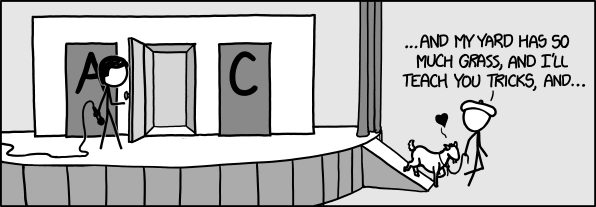

In [2]:
from IPython.display import Image
Image('http://imgs.xkcd.com/comics/monty_hall.png')

1. Work out the probabiliy of winning the car if you switch always, randomly, and never? Explain your results either mathematically or intuitively.

2. Write a piece of code that simulates the game to allow you to verify your findings. 
simulate many games and plot the distribution of wins depending on 3 strategies:
    1. you never switch 
    2. you always switch
    3. you randomly switch
    
3. generalize your code to an arbitrary number of doors.

## Exercise 4: Lifetime of an element (15 points)

if $t$ is the lifetime of an element, which follows an exponential decay law with a charactistic time $\tau$:
$$f(t) = A \exp(-t/\tau)$$

1. find $A$ such that $f(t)$ has properties of a probability density function.
2. what is the mean and standard deviation of this lifetime
3. if $\tau = 5 min$, what is the probability that the lifetime is greater than or equal to $10 min$. 
4. Estimate the probability of a lifetime of at least $10 min$ given that it has been observed for already $5$ minutes: $P(T > 10 min | T > 5 min)$ (same $\tau=5$ min).
5. generalize the previous question: estimate $P(T > a + b | T > a)$.

## Exercice 5: speed of light and error propagation (20 points)

Below is the result of 5 experiments to measure the speed of light with some associated uncertainties.

|measurements | uncertainties |
| ------|---------------------|
| [km/s]| [km/s]              |
|299 794|3                    |
|299 791|5                    |
|299 770|2                    |
|299 789|3                    |
|299 790|4                    |


1. Calculate the best estimate of the speed of light, as well as your uncertainty in that estimate from the measurements only.

2. Take weighted average using uncertainties as weights, and quote the variance of this (all in the lecture notes)

**tip**: be critic about your data, and detail your assumptions.